# 0 IMPORTS

In [61]:
import pickle
import datetime

import pandas           as pd
import numpy            as np
import plotly.express   as px
import seaborn          as sns

## 0.1 Funções de Suporte

In [3]:
# Supressão da notação científica.
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)

In [7]:
import seaborn as sns
from IPython.display        import Image
from IPython.core.display   import HTML

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12,6]
    plt.rcParams['font.size'] = 16
    
    display( HTML('<style>.container { width: 100% !important;} </style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Load Data

In [5]:
reposicons = pickle.load(open("../../data/processed/2_0_eda_reposicons.pkl","rb"))
ceaec = pickle.load(open("../../data/processed/2_0_eda_ceaec.pkl","rb"))

In [6]:
reposicons['maquina'] = "Reposicons"
ceaec['maquina'] = "CEAEC"

In [14]:
reposicons.sample(2)

,subscription_name,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost,year,month,day,week_of_year,year_week,year_month,maquina
1171,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2024-07-04,c089a13a-9dd0-44b5-aa9e-44a77bbd6788,Bandwidth,All,BR South,Standard Data Transfer Out,21.629254,3.914896,2024,7,4,27,2024-27,2024-07,Reposicons
1686,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2023-10-11,b9e5e77c-a0b3-4a2c-9b8b-57fa54f31c52,Storage,Tables,All,Batch Write Operations,0.014600,0.000000,2023,10,11,41,2023-41,2023-10,Reposicons


In [13]:
ceaec.sample(2)

,subscription_name,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost,year,month,day,week_of_year,year_week,year_month,maquina
3963,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2024-02-23,2dba9884-2518-4427-90ff-d2c100c5f775,Storage,Standard SSD Managed Disks,BR South,E6 LRS Disk,0.034488,0.309024,2024,2,23,8,2024-08,2024-02,CEAEC
1379,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2024-03-07,ce957933-8287-4f8b-83ee-53a5cbe056d9,Storage,Standard SSD Managed Disks,All,E4 LRS Disk Operations,59.525900,0.119052,2024,3,7,10,2024-10,2024-03,CEAEC


# 1. Teste Merge

In [7]:
df_concat = pd.concat([reposicons,ceaec], ignore_index=True)
df_concat.sample(10)

,subscription_name,subscription_guid,date,resource_guid,service_name,service_type,service_region,service_resource,quantity,cost,year,month,day,week_of_year,year_week,year_month,data_br,maquina
9281,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2024-01-02,dbefcfc1-e3f6-409b-be6d-9cd7b00724a5,Bandwidth,Inter-Region,North America,Intra Continent Data Transfer Out,0.272011,0.005439,2024,1,2,1,2024-01,2024-01,02/01/2024,CEAEC
9695,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2023-10-06,0b248445-aa24-4fe8-a794-a174929327bd,Storage,Tiered Block Blob,US East,All Other Operations,0.000600,0.000001,2023,10,6,40,2023-40,2023-10,06/10/2023,CEAEC
4136,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2023-12-27,cbe92596-7f61-5f48-ba3d-d624aa141eaf,Backup,All,US East,Azure VM Protected Instances,0.032256,0.322584,2023,12,27,52,2023-52,2023-12,27/12/2023,Reposicons
12726,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2024-02-25,40551b4c-e8be-48ed-b70b-f8d25c7de724,Storage,General Block Blob,All,Read Operations,0.001400,0.000000,2024,2,25,8,2024-08,2024-02,25/02/2024,CEAEC
6334,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2024-05-03,c089a13a-9dd0-44b5-aa9e-44a77bbd6788,Bandwidth,All,BR South,Standard Data Transfer Out,0.173556,0.031413,2024,5,3,18,2024-18,2024-05,03/05/2024,CEAEC
453,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2023-11-12,d54686f0-77ff-43f3-9e7c-2099030d32a7,Azure DNS,All,All,Public Queries,0.001831,0.000729,2023,11,12,45,2023-45,2023-11,12/11/2023,Reposicons
8363,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2024-07-04,13c2d6a4-7f53-47a9-b6aa-8bb6167ac54d,Virtual Machines,BS Series Windows,BR South,B2s,24.000000,1.804800,2024,7,4,27,2024-27,2024-07,04/07/2024,CEAEC
7235,Microsoft Azure Sponsorship,0b1856f5-ffb1-4fb2-9b31-ebc3ddeacf68,2024-03-02,b9e5e77c-a0b3-4a2c-9b8b-57fa54f31c52,Storage,Tables,All,Batch Write Operations,0.043800,0.000000,2024,3,2,9,2024-09,2024-03,02/03/2024,CEAEC
753,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2024-05-19,0ddb5c81-143d-52f8-9ea3-29b64cc0ef97,Backup,All,US East,GRS Data Stored,3.100235,0.146340,2024,5,19,20,2024-20,2024-05,19/05/2024,Reposicons
377,Microsoft Azure Sponsorship,82375e17-0dda-4790-b6e8-c565d4f08e87,2024-09-10,c52a982d-f2ca-46c2-9e2a-06dae03a531d,Functions,Premium,BR South,Premium Memory Duration,252.000000,3.301200,2024,9,10,37,2024-37,2024-09,10/09/2024,Reposicons


In [22]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subscription_name  9456 non-null   object        
 1   subscription_guid  9456 non-null   object        
 2   date               9456 non-null   datetime64[ns]
 3   resource_guid      9456 non-null   object        
 4   service_name       9456 non-null   object        
 5   service_type       9456 non-null   object        
 6   service_region     9456 non-null   object        
 7   service_resource   9456 non-null   object        
 8   quantity           9456 non-null   float64       
 9   cost               9456 non-null   float64       
 10  year               9456 non-null   int32         
 11  month              9456 non-null   int32         
 12  day                9456 non-null   int32         
 13  week_of_year       9456 non-null   UInt32        
 14  year_wee

# 3.0 Modelo

In [1]:
from prophet    import Prophet

e:\3_recursos\2_area\profissional\cursos\v3119\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df = df_concat

In [11]:
df.columns

Index(['subscription_name', 'subscription_guid', 'date', 'resource_guid',
       'service_name', 'service_type', 'service_region', 'service_resource',
       'quantity', 'cost', 'year', 'month', 'day', 'week_of_year', 'year_week',
       'year_month', 'data_br', 'maquina'],
      dtype='object')

In [24]:
df_model = reposicons.loc[reposicons['service_name'] != "Functions", ['date','cost']].groupby('date').sum().sort_values(by='date').reset_index()
df_model.sample(5)

,date,cost
285,2024-06-28,9.444094
275,2024-06-18,6.206441
110,2024-01-05,0.663667
170,2024-03-05,5.939630
154,2024-02-18,5.960417


In [25]:
df_model.rename(columns = {"date":"ds", "cost":"y"}, inplace = True)

In [26]:
m = Prophet()
m.fit(df_model)

12:30:26 - cmdstanpy - INFO - Chain [1] start processing
12:30:26 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future = m.make_future_dataframe(periods=(105+365))
forecast = m.predict(future)

In [57]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
832,2025-12-27,11.884309,7.929387,15.977992
833,2025-12-28,11.962580,7.866888,15.950687
834,2025-12-29,11.948028,7.994920,16.206567
835,2025-12-30,11.922127,8.152019,16.279860
836,2025-12-31,11.848456,7.909848,15.929190


In [53]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          472 non-null    datetime64[ns]
 1   trend                       472 non-null    float64       
 2   yhat_lower                  472 non-null    float64       
 3   yhat_upper                  472 non-null    float64       
 4   trend_lower                 472 non-null    float64       
 5   trend_upper                 472 non-null    float64       
 6   additive_terms              472 non-null    float64       
 7   additive_terms_lower        472 non-null    float64       
 8   additive_terms_upper        472 non-null    float64       
 9   weekly                      472 non-null    float64       
 10  weekly_lower                472 non-null    float64       
 11  weekly_upper                472 non-null    float64       

In [54]:
df_line = forecast.loc[forecast['ds'] >= '2024-09-18',['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
px.line(
        data_frame=df_line,
        x = 'ds',
        y = ['yhat', 'yhat_lower', 'yhat_upper'],
        title='Previsão com Intervalo de Confiança',
        labels={'ds': 'Data', 'yhat': 'Previsão', 'yhat_lower': 'Limite Inferior', 'yhat_upper': 'Limite Superior'},
        color_discrete_sequence=px.colors.qualitative.Pastel
        )

In [55]:
df_line[['yhat', 'yhat_lower', 'yhat_upper']].sum()

yhat           846.180746
yhat_lower     558.982434
yhat_upper    1132.433317
dtype: float64

In [58]:
def estatistica_descritiva(df1):
    # Medidas de tendência central - Mean, Median
    media = pd.DataFrame(df1.apply(np.mean)).T
    mediana = pd.DataFrame(df1.apply(np.median)).T
    
    # Medidas de Dispersão - Std, min, max, range, skew, kurtosis
    desvio_padrao = pd.DataFrame(df1.apply(np.std)).T
    minimo = pd.DataFrame(df1.apply(np.min)).T
    maximo = pd.DataFrame(df1.apply(np.max)).T
    range = pd.DataFrame(df1.apply(lambda x : x.max() - x.min())).T
    assimetria = pd.DataFrame(df1.apply(lambda x : x.skew())).T
    curtosis = pd.DataFrame(df1.apply(lambda x : x.kurtosis())).T
    
    estatistica = pd.concat([minimo, maximo, range, media, mediana, desvio_padrao, assimetria, curtosis]).T.reset_index()
    estatistica.columns = ['variaveis','minimo', 'maximo', 'range', 'media', 'mediana', 'desvio_padrao', 'assimetria', 'curtosis']
    
    return estatistica

In [65]:
from IPython.display        import Image
from IPython.core.display   import HTML

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [18,10]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width: 100% !important;} </style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [66]:
df_estatistica = df_line[['yhat', 'yhat_lower', 'yhat_upper']]
estatistica_descritiva(df_estatistica)

,variaveis,minimo,maximo,range,media,mediana,desvio_padrao,assimetria,curtosis
0,yhat,7.505550,8.609530,1.103981,8.058864,8.053223,0.289767,-0.001920,-1.036555
1,yhat_lower,4.766718,6.132461,1.365743,5.323642,5.352190,0.304977,-0.036902,-0.769242
2,yhat_upper,10.096863,11.591823,1.494960,10.785079,10.782897,0.307862,0.027100,-0.532613


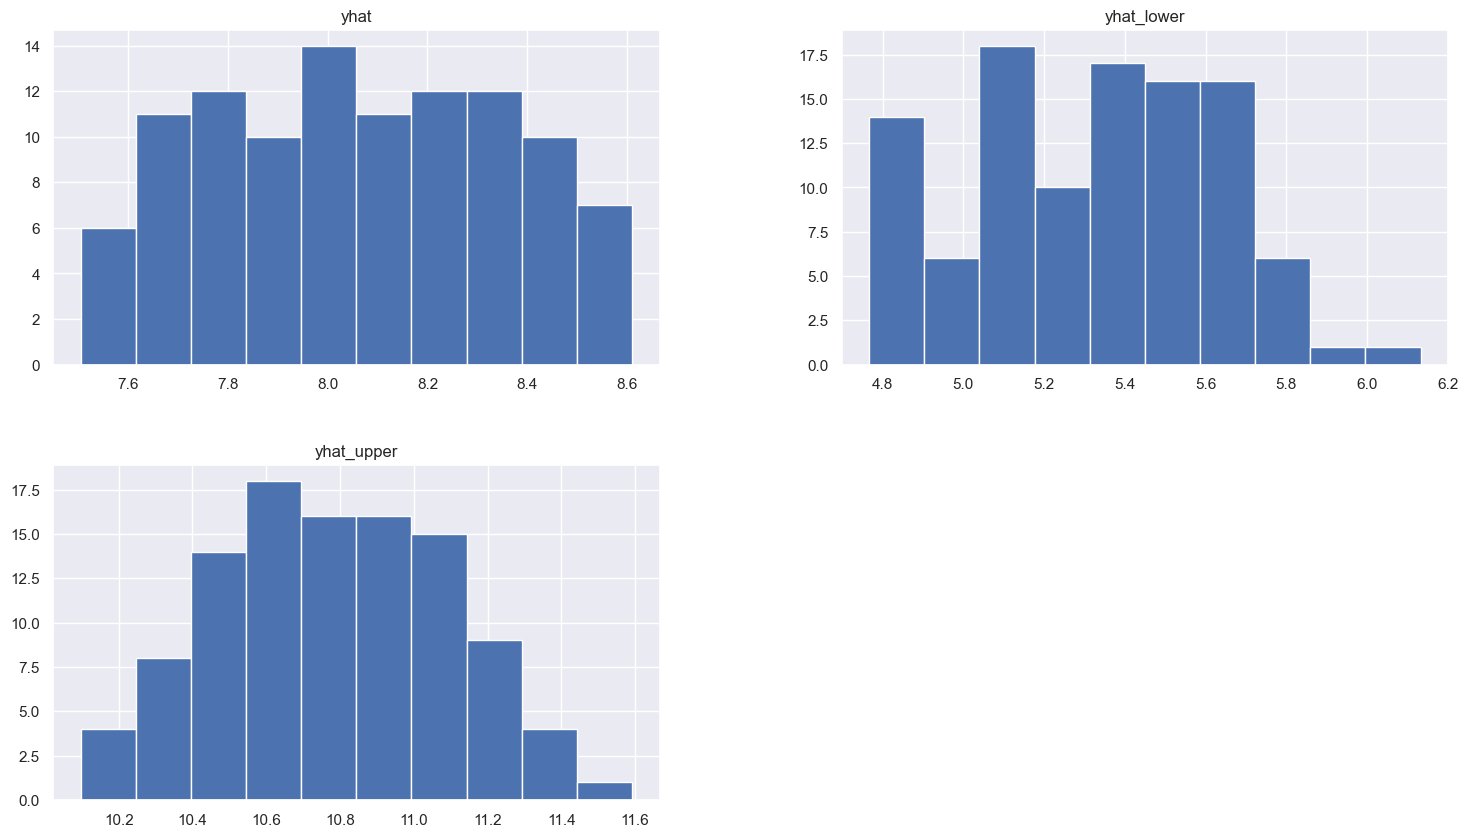

In [67]:
df_estatistica.hist();

# Testes pagina update dados

In [1]:
import inflection

import streamlit as st
import pandas as pd

In [ ]:
def renomear_colunas(df: pd.DataFrame)-> pd.DataFrame:
    
    columns_old = df.columns
    snakecase = lambda x : inflection.underscore(x)
    columns_new = list(map(snakecase,columns_old))
    df.columns = columns_new
    return df

In [8]:
def verificar_df(df: pd.DataFrame)-> pd.DataFrame:
    
    if isinstance(df, pd.DataFrame):
        return df
    else:
        mensagem = f"Você enviou um {type(df)}, não pode ser aceito.\n"\
                    "Escolha um arquivo CSV e siga as orientações no menu."
        return mensagem

In [10]:
qualquer = pd.DataFrame()
print(verificar_df(qualquer))

Empty DataFrame
Columns: []
Index: []
